# Comments and results

## Part 1

First, let's calculate 

$g^1_{PD}(z) = \mathbb{E}_{X_2}[(z+X_2)^2] = \mathbb{E}_{X_2}[z^2 + 2zX_2 + X_2^2] = \mathbb{E}_{X_2}z^2 + \mathbb{E}_{X_2}[2zX_2] + \mathbb{E}_{X_2}X_2^2 = z^2 + 2z\mathbb{E}_{X_2}[X_2] + \mathbb{E}_{X_2}[X_2^2].$

Now, notice that in the given distribution
$\mathbb{E}_{X_2}X_2 = 0$ and $\mathbb{E}_{X_2}[X_2^2] = \frac{1}{3}.$


Finally, we get 

$g^1_{PD}(z) = z^2 + \frac{1}{3}.$

## Part 2

### Description

In the second part I examined Random Forest model fit to the heart dataset. The task here is to predict probability of heart attack. I have shown results for a small sample containing four examples on the plot. We can see that the local explanations differ in some cases. Locally, from the perspective of sample 101 age decreases the probability, while in sample 228 it's increased. Similar difference occurs for samples 101/228 and variable trtbps (resting blood pressure). This is not very surprising, as we are dealing with local explanations. It's easy to imagine that for certain group of patients (with specific symptoms/characteristics) probability of heart attack may indeed be higher in younger age.

Figures number 3 and 4 show results for global explanation method PDP with Random Forest and Gradient Boosting models, respectively. It's important to note that in this case we can see more stable, less sharp curves. The explanations are very similar between models, which shows that probably both models recognize similar patterns in the data.

### Plots

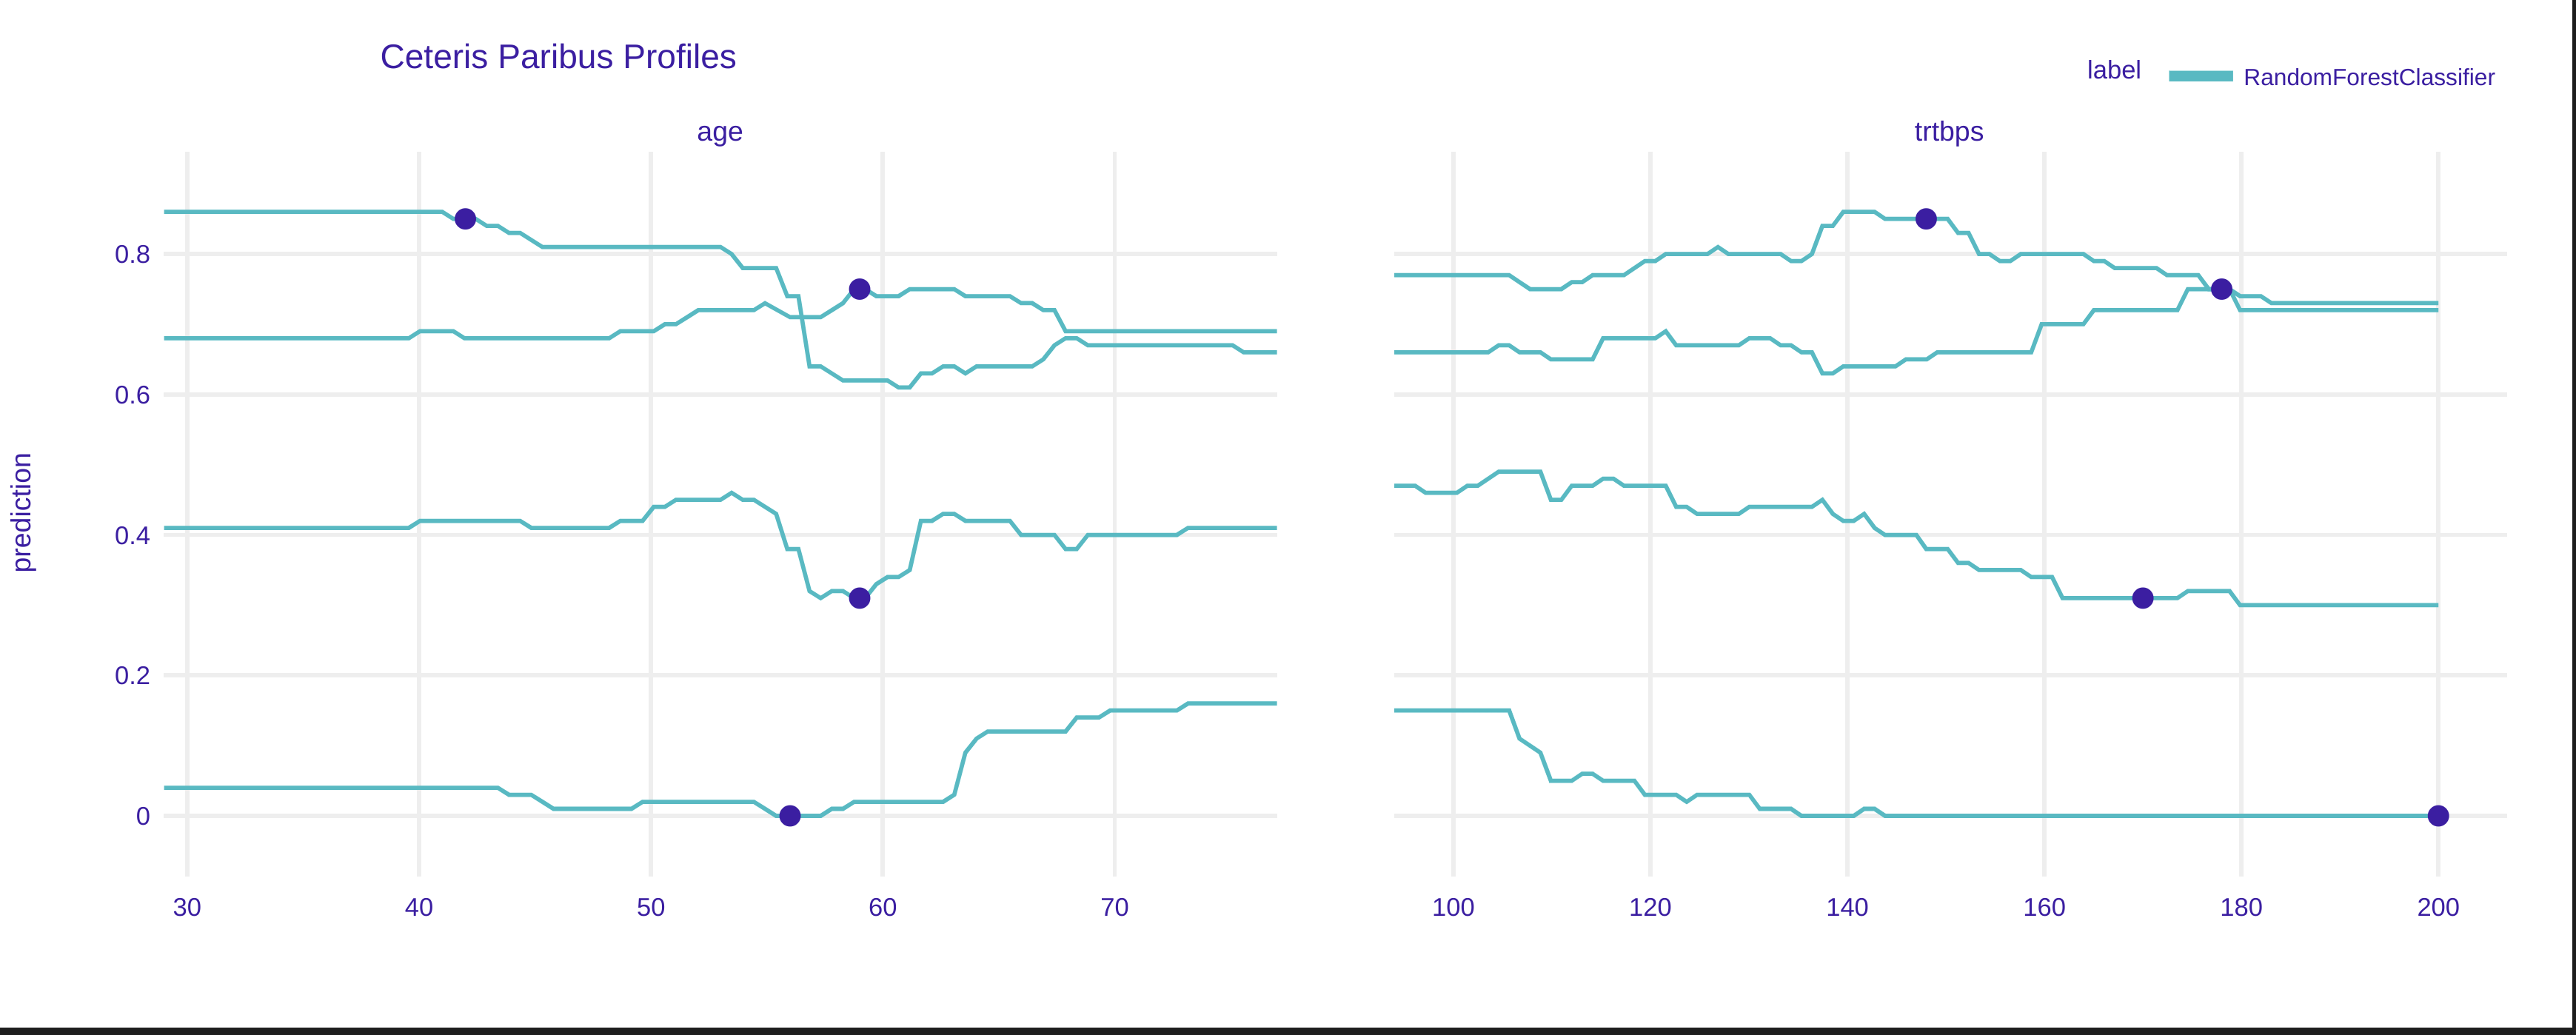

![Alt text](plot_3.png)                                                         

![Alt text](plot_4.png)

# Appendix

## Task 2

### Data preparation

In [4]:
df = pd.read_csv("heart.csv")
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [5]:
model = RandomForestClassifier().fit(X, y)

### Ceteris Paribus

In [6]:
ind_to_explain = [101, 228, 100, 223]
X_to_explain = X.iloc[ind_to_explain, :]

In [7]:
def predict_fun(model, x):
  return model.predict_proba(x)[:, 1]

explainer = Explainer(model, X, y, predict_function=predict_fun)
profile = explainer.predict_profile(X_to_explain)

/home/kuba/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Preparation of a new explainer is initiated

  -> data              : 303 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function predict_fun at 0x7f35875cd870> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.546, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.35, mean = -0.00112, max = 0.37
  -> model_info        : package sklearn

A new explainer has been created!


Calculating ceteris paribus: 100%|██████████| 13/13 [00:00<00:00, 68.48it/s]


In [8]:
fig2 = profile.plot(variables=["age", "trtbps"], show=False)
fig2.show()

### PDP

In [9]:
pdp = explainer.model_profile()
fig3 = pdp.plot(show=False)
fig3.show()

Calculating ceteris paribus: 100%|██████████| 13/13 [00:01<00:00,  6.81it/s]


In [10]:
boost_cls = GradientBoostingClassifier()
boost_cls.fit(X, y)

explainer = Explainer(boost_cls, X, y, predict_function=predict_fun)

Preparation of a new explainer is initiated

  -> data              : 303 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function predict_fun at 0x7f35875cd870> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00366, mean = 0.544, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.767, mean = 5.85e-05, max = 0.593
  -> model_info        : package sklearn

A new explainer has been created!


/home/kuba/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



In [11]:
pdp = explainer.model_profile()
fig4 = pdp.plot(show=False)
fig4.show()

Calculating ceteris paribus: 100%|██████████| 13/13 [00:00<00:00, 34.54it/s]
